In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Coli

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch
import os

input_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/filtered_data/filtered_coli.csv"  # Update with your file path
df = pd.read_csv(input_path)
df = df.dropna(subset=["Sequence", "Cleaned_MIC"])
df["Sequence"] = df["Sequence"].str.upper().str.replace("[^ACDEFGHIKLMNPQRSTVWY]", "", regex=True)
df = df[df["Sequence"].str.len() > 10].reset_index(drop=True)

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_mic_targets.npy"

def embed_sequence(seq):
    seq = " ".join(list(seq))
    tokens = tokenizer(seq, return_tensors="pt", truncation=True, padding='max_length', max_length=512)
    with torch.no_grad():
        output = model(**{k: v.to(device) for k, v in tokens.items()})
    return output.last_hidden_state.mean(1).squeeze().cpu().numpy()

if os.path.exists(embedding_path) and os.path.exists(target_path):
    print("Loading existing embeddings...")
    embeddings = np.load(embedding_path)
    targets = np.load(target_path)
else:
    print("Embedding sequences with ProtBERT...")
    embeddings = []
    for i, seq in enumerate(tqdm(df["Sequence"])):
        emb = embed_sequence(seq)
        embeddings.append(emb)
        if i % 100 == 0:
            np.save(embedding_path, np.vstack(embeddings))
    embeddings = np.vstack(embeddings)
    np.save(embedding_path, embeddings)
    targets = np.log1p(df["Cleaned_MIC"].values)
    np.save(target_path, targets)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Loading existing embeddings...


# Aur

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch
import os

input_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/filtered_data/filtered_aur.csv"  # Update with your file path
df = pd.read_csv(input_path)
df = df.dropna(subset=["Sequence", "Cleaned_MIC"])
df["Sequence"] = df["Sequence"].str.upper().str.replace("[^ACDEFGHIKLMNPQRSTVWY]", "", regex=True)
df = df[df["Sequence"].str.len() > 10].reset_index(drop=True)

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_mic_targets.npy"

def embed_sequence(seq):
    seq = " ".join(list(seq))
    tokens = tokenizer(seq, return_tensors="pt", truncation=True, padding='max_length', max_length=512)
    with torch.no_grad():
        output = model(**{k: v.to(device) for k, v in tokens.items()})
    return output.last_hidden_state.mean(1).squeeze().cpu().numpy()

if os.path.exists(embedding_path) and os.path.exists(target_path):
    print("Loading existing embeddings...")
    embeddings = np.load(embedding_path)
    targets = np.load(target_path)
else:
    print("Embedding sequences with ProtBERT...")
    embeddings = []
    for i, seq in enumerate(tqdm(df["Sequence"])):
        emb = embed_sequence(seq)
        embeddings.append(emb)
        if i % 100 == 0:
            np.save(embedding_path, np.vstack(embeddings))
    embeddings = np.vstack(embeddings)
    np.save(embedding_path, embeddings)
    targets = np.log1p(df["Cleaned_MIC"].values)
    np.save(target_path, targets)


# Arg

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch
import os

input_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/filtered_data/filtered_arg.csv"  # Update with your file path
df = pd.read_csv(input_path)
df = df.dropna(subset=["Sequence", "Cleaned_MIC"])
df["Sequence"] = df["Sequence"].str.upper().str.replace("[^ACDEFGHIKLMNPQRSTVWY]", "", regex=True)
df = df[df["Sequence"].str.len() > 10].reset_index(drop=True)

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_mic_targets.npy"

def embed_sequence(seq):
    seq = " ".join(list(seq))
    tokens = tokenizer(seq, return_tensors="pt", truncation=True, padding='max_length', max_length=512)
    with torch.no_grad():
        output = model(**{k: v.to(device) for k, v in tokens.items()})
    return output.last_hidden_state.mean(1).squeeze().cpu().numpy()

if os.path.exists(embedding_path) and os.path.exists(target_path):
    print("Loading existing embeddings...")
    embeddings = np.load(embedding_path)
    targets = np.load(target_path)
else:
    print("Embedding sequences with ProtBERT...")
    embeddings = []
    for i, seq in enumerate(tqdm(df["Sequence"])):
        emb = embed_sequence(seq)
        embeddings.append(emb)
        if i % 100 == 0:
            np.save(embedding_path, np.vstack(embeddings))
    embeddings = np.vstack(embeddings)
    np.save(embedding_path, embeddings)
    targets = np.log1p(df["Cleaned_MIC"].values)
    np.save(target_path, targets)


🔄 Embedding sequences with ProtBERT...


100%|██████████| 4696/4696 [10:18<00:00,  7.60it/s]


# Pne

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch
import os

input_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/filtered_data/filtered_pne.csv"  # Update with your file path
df = pd.read_csv(input_path)
df = df.dropna(subset=["Sequence", "Cleaned_MIC"])
df["Sequence"] = df["Sequence"].str.upper().str.replace("[^ACDEFGHIKLMNPQRSTVWY]", "", regex=True)
df = df[df["Sequence"].str.len() > 10].reset_index(drop=True)

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_mic_targets.npy"

def embed_sequence(seq):
    seq = " ".join(list(seq))
    tokens = tokenizer(seq, return_tensors="pt", truncation=True, padding='max_length', max_length=512)
    with torch.no_grad():
        output = model(**{k: v.to(device) for k, v in tokens.items()})
    return output.last_hidden_state.mean(1).squeeze().cpu().numpy()

if os.path.exists(embedding_path) and os.path.exists(target_path):
    print("Loading existing embeddings...")
    embeddings = np.load(embedding_path)
    targets = np.load(target_path)
else:
    print("🔄 Embedding sequences with ProtBERT...")
    embeddings = []
    for i, seq in enumerate(tqdm(df["Sequence"])):
        emb = embed_sequence(seq)
        embeddings.append(emb)
        if i % 100 == 0:
            np.save(embedding_path, np.vstack(embeddings))
    embeddings = np.vstack(embeddings)
    np.save(embedding_path, embeddings)
    targets = np.log1p(df["Cleaned_MIC"].values)
    np.save(target_path, targets)


# Models

## Coli


SVR Results:
MSE(log): 0.0830, MSE: 0.8930, R2: 0.4855, MAE: 0.2195, Pearson: 0.6975, Kendall: 0.4973

Random Forest Results:
MSE(log): 0.0538, MSE: 0.5306, R2: 0.6665, MAE: 0.1658, Pearson: 0.8238, Kendall: 0.6536

XGBoost Results:
MSE(log): 0.0481, MSE: 0.4864, R2: 0.7023, MAE: 0.1375, Pearson: 0.8394, Kendall: 0.6725

MLP Results:
MSE(log): 0.0492, MSE: 0.4914, R2: 0.6951, MAE: 0.1480, Pearson: 0.8365, Kendall: 0.6613

✅ Best model based on R² + MSE: XGBoost
📁 Results saved to /content/drive/MyDrive/AMPs/Project Data/Regression Part/results/coli_model_evaluation_results.csv


<ipython-input-12-c4504cd1c511>:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-12-c4504cd1c511>:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-12-c4504cd1c511>:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-12-c4504cd1c511>:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)


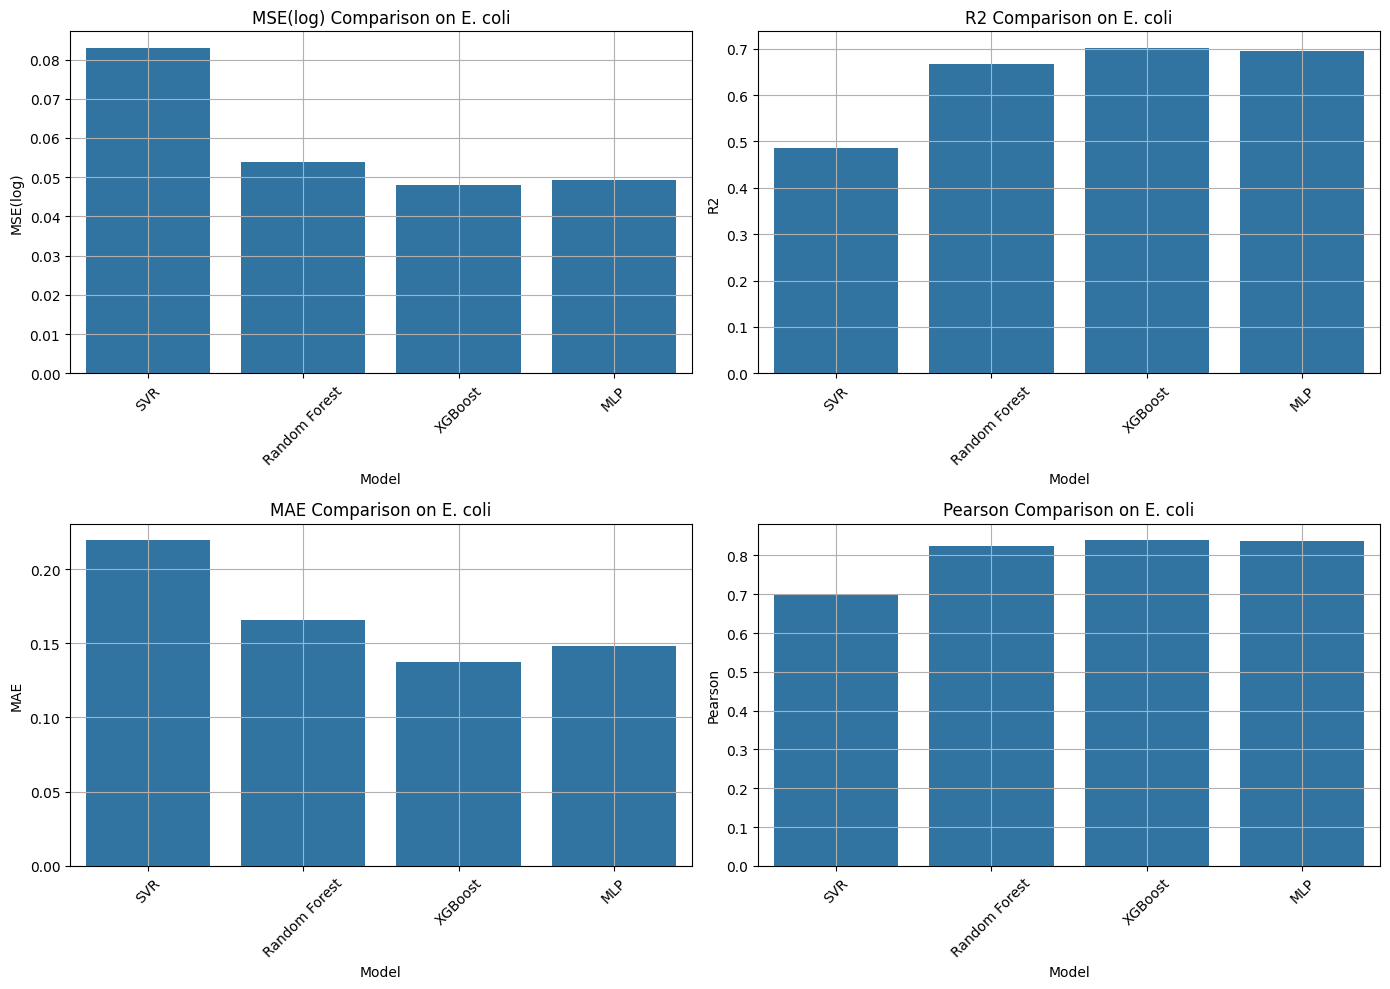

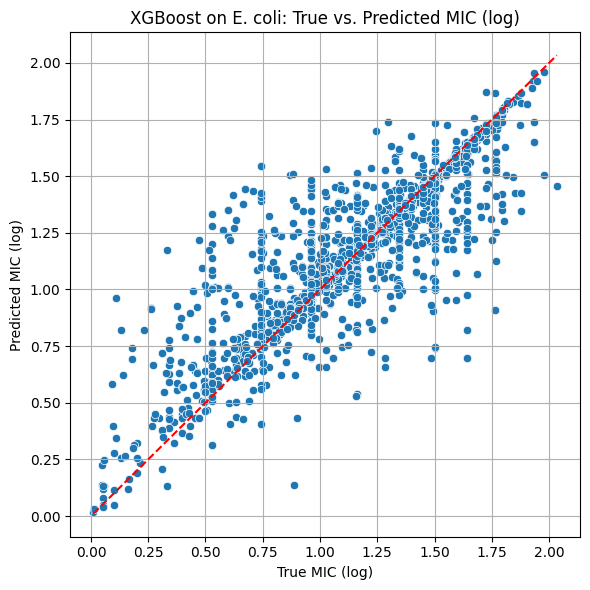

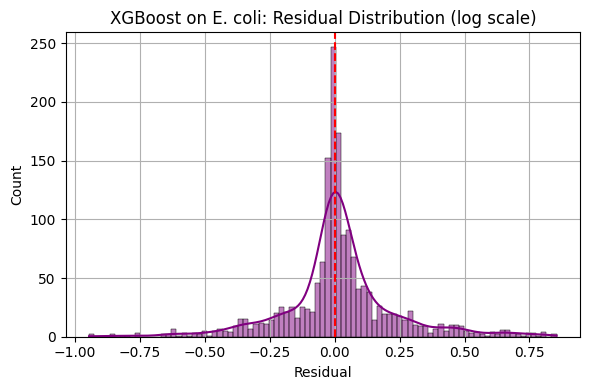

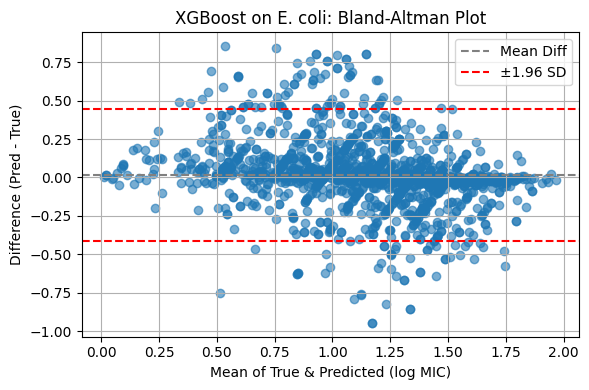

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_mic_targets.npy"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


results = {}
predictions = {}

def evaluate_model(model, model_name, X_train_input, X_test_input):
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
    mse_no_log = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test_log, np.log1p(y_pred))
    mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
    pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
    kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

    results[model_name] = {
        'MSE(log)': mse_log, 'MSE': mse_no_log, 'R2': r2,
        'MAE': mae, 'Pearson': pearson, 'Kendall': kendall
    }
    predictions[model_name] = y_pred

    print(f"\n{model_name} Results:")
    print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}, MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


evaluate_model(SVR(kernel='rbf'), "SVR", X_train_pca, X_test_pca)
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest", X_train, X_test)
evaluate_model(xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42), "XGBoost", X_train, X_test)
evaluate_model(MLPRegressor(hidden_layer_sizes=(512, 128), max_iter=500, random_state=42), "MLP", X_train_pca, X_test_pca)


df_results = pd.DataFrame(results).T
df_results['R2_rank'] = df_results['R2'].rank(ascending=False)
df_results['MSE_rank'] = df_results['MSE'].rank(ascending=True)
df_results['Combined_rank'] = df_results['R2_rank'] + df_results['MSE_rank']
best_model_name = df_results['Combined_rank'].idxmin()

# Save results
save_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/results/coli_model_evaluation_results.csv"
df_results.to_csv(save_path, index=True)
print(f"\nBest model based on R² + MSE: {best_model_name}")
print(f"📁 Results saved to {save_path}")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['MSE(log)', 'R2', 'MAE', 'Pearson']
for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x=df_results.index, y=df_results[metric], ax=ax)
    ax.set_title(f'{metric} Comparison on {organism}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(df_results.index, rotation=45)
    ax.grid(True)
plt.tight_layout()
plt.show()


y_pred = predictions[best_model_name]
y_true_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
residuals = y_pred_log - y_true_log

# Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true_log, y=y_pred_log)
plt.plot([min(y_true_log), max(y_true_log)], [min(y_true_log), max(y_true_log)], 'r--')
plt.xlabel("True MIC (log)")
plt.ylabel("Predicted MIC (log)")
plt.title(f"{best_model_name} on {organism}: True vs. Predicted MIC (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Residual Distribution (log scale)")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bland-Altman
mean_values = (y_true_log + y_pred_log) / 2
diff = y_pred_log - y_true_log
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.figure(figsize=(6, 4))
plt.scatter(mean_values, diff, alpha=0.6)
plt.axhline(mean_diff, color='gray', linestyle='--', label="Mean Diff")
plt.axhline(mean_diff + 1.96 * std_diff, color='red', linestyle='--', label="±1.96 SD")
plt.axhline(mean_diff - 1.96 * std_diff, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Bland-Altman Plot")
plt.xlabel("Mean of True & Predicted (log MIC)")
plt.ylabel("Difference (Pred - True)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Aur

Training and evaluating SVR...

SVR Results:
MSE(log): 0.1022, MSE: 1.0674, R2: 0.3723, MAE: 0.2431, Pearson: 0.6108, Kendall: 0.4353
Training and evaluating Random Forest...

Random Forest Results:
MSE(log): 0.0583, MSE: 0.5490, R2: 0.6419, MAE: 0.1746, Pearson: 0.8100, Kendall: 0.6348
Training and evaluating XGBoost...

XGBoost Results:
MSE(log): 0.0517, MSE: 0.4988, R2: 0.6828, MAE: 0.1472, Pearson: 0.8278, Kendall: 0.6536
Training and evaluating MLP...

MLP Results:
MSE(log): 0.0554, MSE: 0.5078, R2: 0.6599, MAE: 0.1582, Pearson: 0.8222, Kendall: 0.6482

✅ Best model based on R² + MSE: XGBoost
📁 Results saved to /content/drive/MyDrive/AMPs/Project Data/Regression Part/results/aur_model_evaluation_results.csv


<ipython-input-11-b99a3766f490>:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-11-b99a3766f490>:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-11-b99a3766f490>:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-11-b99a3766f490>:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)


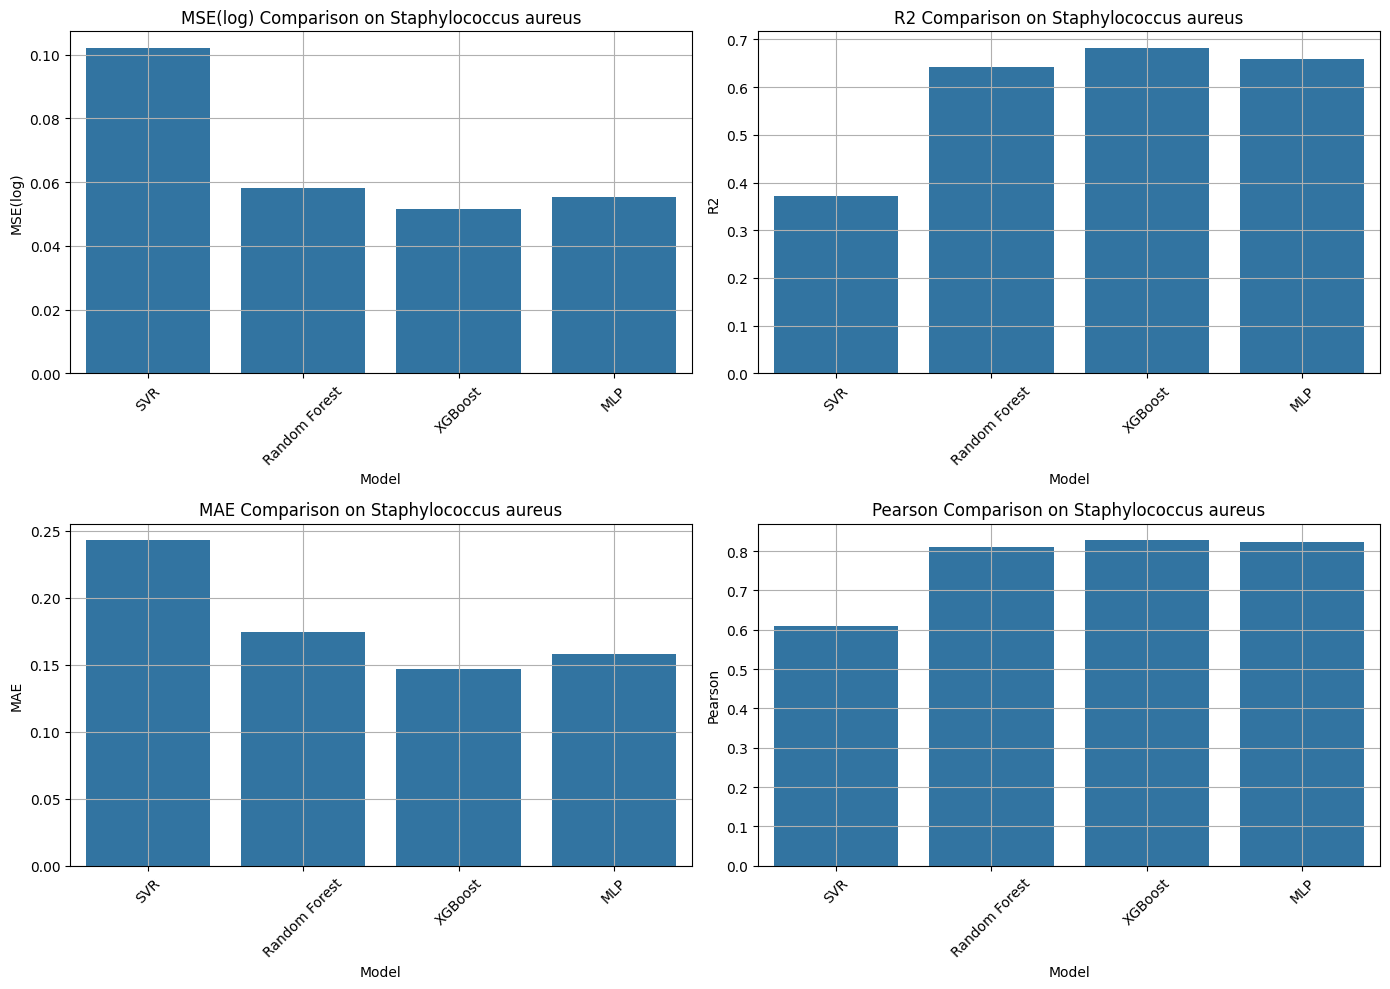

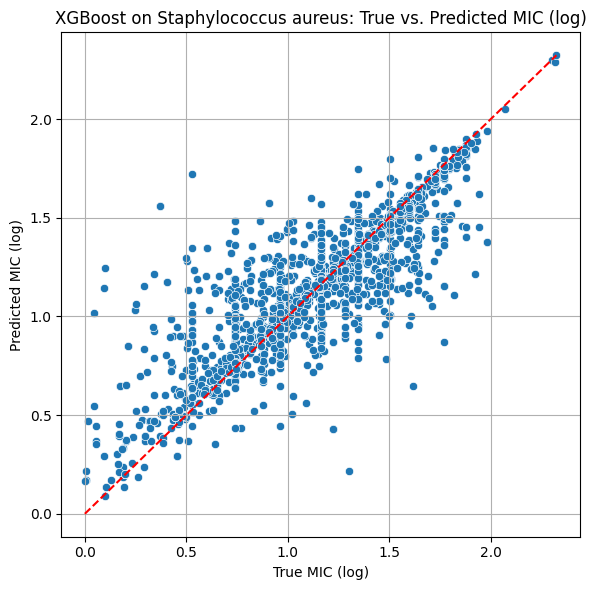

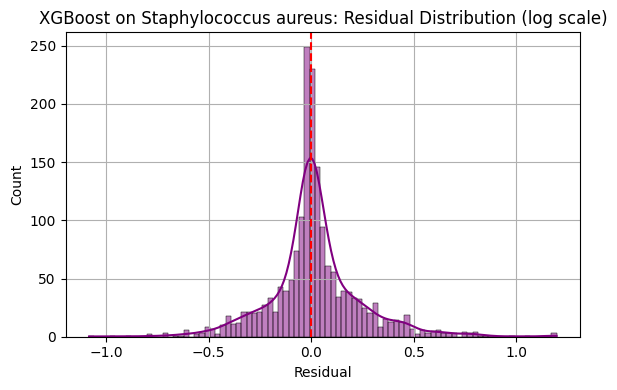

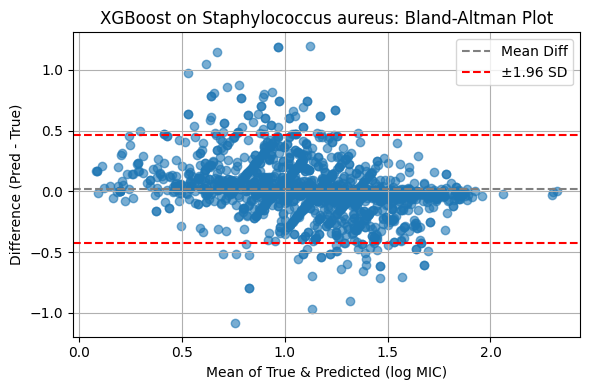

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_mic_targets.npy"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


results = {}
predictions = {}

def evaluate_model(model, model_name, X_train_input, X_test_input):
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
    mse_no_log = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test_log, np.log1p(y_pred))
    mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
    pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
    kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

    results[model_name] = {
        'MSE(log)': mse_log, 'MSE': mse_no_log, 'R2': r2,
        'MAE': mae, 'Pearson': pearson, 'Kendall': kendall
    }
    predictions[model_name] = y_pred

    print(f"\n{model_name} Results:")
    print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}, MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


print("Training and evaluating SVR...")
evaluate_model(SVR(kernel='rbf'), "SVR", X_train_pca, X_test_pca)

print("Training and evaluating Random Forest...")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest", X_train, X_test)

print("Training and evaluating XGBoost...")
evaluate_model(xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42), "XGBoost", X_train, X_test)

print("Training and evaluating MLP...")
evaluate_model(MLPRegressor(hidden_layer_sizes=(512, 128), max_iter=500, random_state=42), "MLP", X_train_pca, X_test_pca)


df_results = pd.DataFrame(results).T
df_results['R2_rank'] = df_results['R2'].rank(ascending=False)
df_results['MSE_rank'] = df_results['MSE'].rank(ascending=True)
df_results['Combined_rank'] = df_results['R2_rank'] + df_results['MSE_rank']
best_model_name = df_results['Combined_rank'].idxmin()

save_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/results/aur_model_evaluation_results.csv"
df_results.to_csv(save_path, index=True)
print(f"\nBest model based on R² + MSE: {best_model_name}")
print(f"📁 Results saved to {save_path}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['MSE(log)', 'R2', 'MAE', 'Pearson']

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x=df_results.index, y=df_results[metric], ax=ax)
    ax.set_title(f'{metric} Comparison on {organism}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(df_results.index, rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()


y_pred = predictions[best_model_name]
y_true_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
residuals = y_pred_log - y_true_log

# Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true_log, y=y_pred_log)
plt.plot([min(y_true_log), max(y_true_log)], [min(y_true_log), max(y_true_log)], 'r--')
plt.xlabel("True MIC (log)")
plt.ylabel("Predicted MIC (log)")
plt.title(f"{best_model_name} on {organism}: True vs. Predicted MIC (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Residual Distribution (log scale)")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bland-Altman
mean_values = (y_true_log + y_pred_log) / 2
diff = y_pred_log - y_true_log
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.figure(figsize=(6, 4))
plt.scatter(mean_values, diff, alpha=0.6)
plt.axhline(mean_diff, color='gray', linestyle='--', label="Mean Diff")
plt.axhline(mean_diff + 1.96 * std_diff, color='red', linestyle='--', label="±1.96 SD")
plt.axhline(mean_diff - 1.96 * std_diff, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Bland-Altman Plot")
plt.xlabel("Mean of True & Predicted (log MIC)")
plt.ylabel("Difference (Pred - True)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Arg

Training and evaluating SVR...

SVR Results:
MSE(log): 0.0817, MSE: 0.9359, R2: 0.5042, MAE: 0.2157, Pearson: 0.7140, Kendall: 0.5114
Training and evaluating Random Forest Regressor...

Random Forest Results:
MSE(log): 0.0566, MSE: 0.5784, R2: 0.6567, MAE: 0.1662, Pearson: 0.8188, Kendall: 0.6581
Training and evaluating XGBoost...

XGBoost Results:
MSE(log): 0.0517, MSE: 0.5227, R2: 0.6864, MAE: 0.1233, Pearson: 0.8311, Kendall: 0.6922
Training and evaluating MLP Regressor...

MLP Results:
MSE(log): 0.0563, MSE: 0.5924, R2: 0.6583, MAE: 0.1453, Pearson: 0.8187, Kendall: 0.6693

✅ Best model based on R² + MSE: XGBoost
📁 Results saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/results/arg_model_evaluation_results.csv


<ipython-input-10-4d1ad1d04ac5>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-10-4d1ad1d04ac5>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-10-4d1ad1d04ac5>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-10-4d1ad1d04ac5>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)


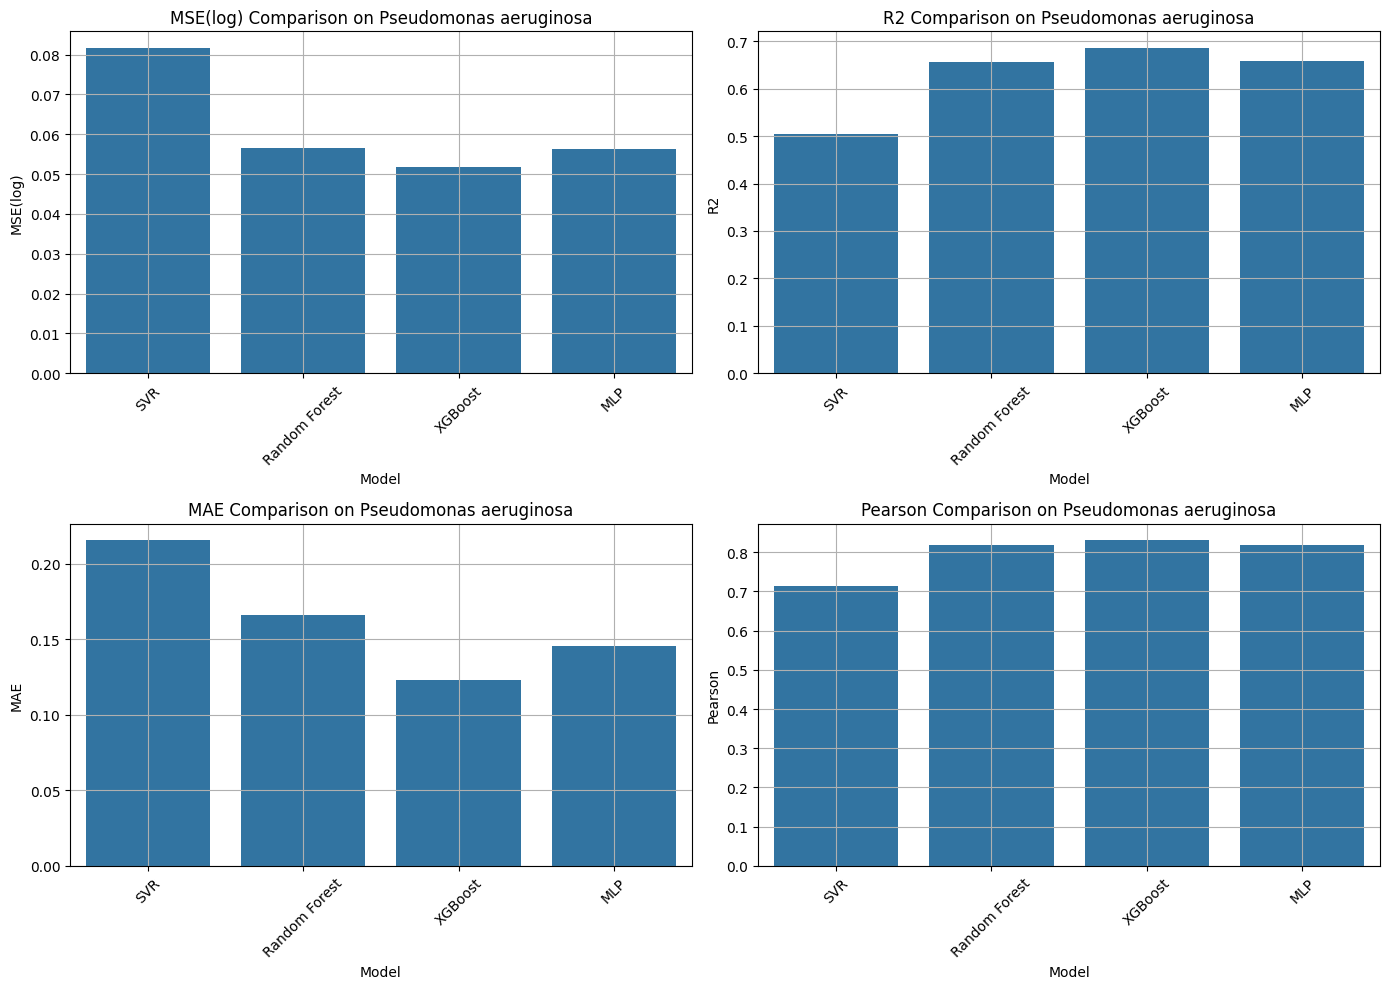

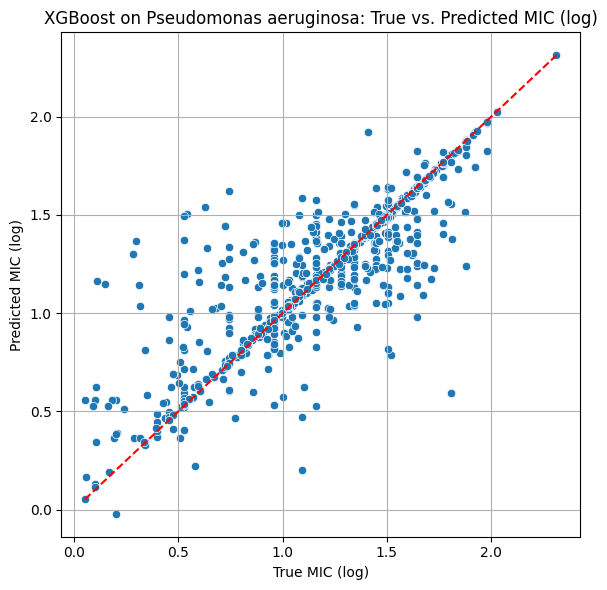

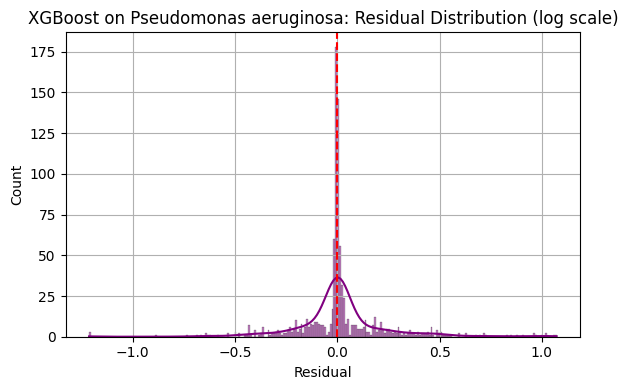

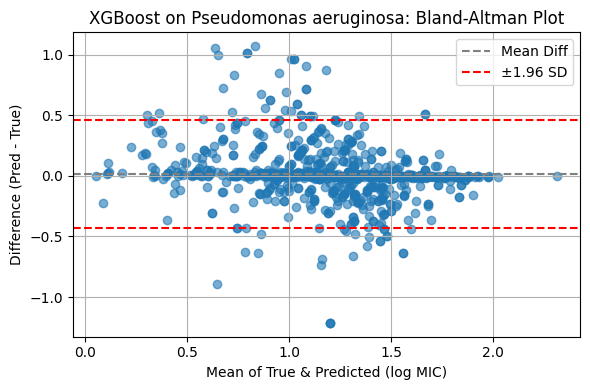

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_mic_targets.npy"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)


X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


results = {}
predictions = {}

def evaluate_model(model, model_name, X_train_input, X_test_input):
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
    mse_no_log = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test_log, np.log1p(y_pred))
    mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
    pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
    kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

    results[model_name] = {
        'MSE(log)': mse_log, 'MSE': mse_no_log, 'R2': r2,
        'MAE': mae, 'Pearson': pearson, 'Kendall': kendall
    }

    predictions[model_name] = y_pred
    print(f"\n{model_name} Results:")
    print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}, MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


print("Training and evaluating SVR...")
evaluate_model(SVR(kernel='rbf'), "SVR", X_train_pca, X_test_pca)

print("Training and evaluating Random Forest Regressor...")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest", X_train, X_test)

print("Training and evaluating XGBoost...")
evaluate_model(xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42), "XGBoost", X_train, X_test)

print("Training and evaluating MLP Regressor...")
evaluate_model(MLPRegressor(hidden_layer_sizes=(512, 128), max_iter=500, random_state=42), "MLP", X_train_pca, X_test_pca)


df_results = pd.DataFrame(results).T
df_results['R2_rank'] = df_results['R2'].rank(ascending=False)
df_results['MSE_rank'] = df_results['MSE'].rank(ascending=True)
df_results['Combined_rank'] = df_results['R2_rank'] + df_results['MSE_rank']
best_model_name = df_results['Combined_rank'].idxmin()

results_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/results/arg_model_evaluation_results.csv"
df_results.to_csv(results_path, index=True)
print(f"\nBest model based on R² + MSE: {best_model_name}")
print(f"📁 Results saved to: {results_path}")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['MSE(log)', 'R2', 'MAE', 'Pearson']

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x=df_results.index, y=df_results[metric], ax=ax)
    ax.set_title(f'{metric} Comparison on {organism}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(df_results.index, rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()


y_pred = predictions[best_model_name]
y_true_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
residuals = y_pred_log - y_true_log

# Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true_log, y=y_pred_log)
plt.plot([min(y_true_log), max(y_true_log)], [min(y_true_log), max(y_true_log)], 'r--')
plt.xlabel("True MIC (log)")
plt.ylabel("Predicted MIC (log)")
plt.title(f"{best_model_name} on {organism}: True vs. Predicted MIC (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Residual Distribution (log scale)")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bland-Altman Plot
mean_values = (y_true_log + y_pred_log) / 2
diff = y_pred_log - y_true_log
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.figure(figsize=(6, 4))
plt.scatter(mean_values, diff, alpha=0.6)
plt.axhline(mean_diff, color='gray', linestyle='--', label="Mean Diff")
plt.axhline(mean_diff + 1.96 * std_diff, color='red', linestyle='--', label="±1.96 SD")
plt.axhline(mean_diff - 1.96 * std_diff, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Bland-Altman Plot")
plt.xlabel("Mean of True & Predicted (log MIC)")
plt.ylabel("Difference (Pred - True)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Pne

Training and evaluating SVR...

SVR Results:
MSE(log): 0.0805, MSE: 0.7302, R2: 0.6135, MAE: 0.2002, Pearson: 0.7854, Kendall: 0.5875
Training and evaluating Random Forest Regressor...

Random Forest Results:
MSE(log): 0.0578, MSE: 0.4709, R2: 0.7224, MAE: 0.1610, Pearson: 0.8572, Kendall: 0.7003
Training and evaluating XGBoost...

XGBoost Results:
MSE(log): 0.0547, MSE: 0.4580, R2: 0.7375, MAE: 0.1267, Pearson: 0.8639, Kendall: 0.7203
Training and evaluating MLP Regressor...

MLP Results:
MSE(log): 0.0538, MSE: 0.4292, R2: 0.7416, MAE: 0.1479, Pearson: 0.8693, Kendall: 0.7194

✅ Best model based on R² + MSE: MLP
📁 Results saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/results/pne_model_evaluation_results.csv


<ipython-input-9-4e250dc9529b>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-9-4e250dc9529b>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-9-4e250dc9529b>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)
<ipython-input-9-4e250dc9529b>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_results.index, rotation=45)


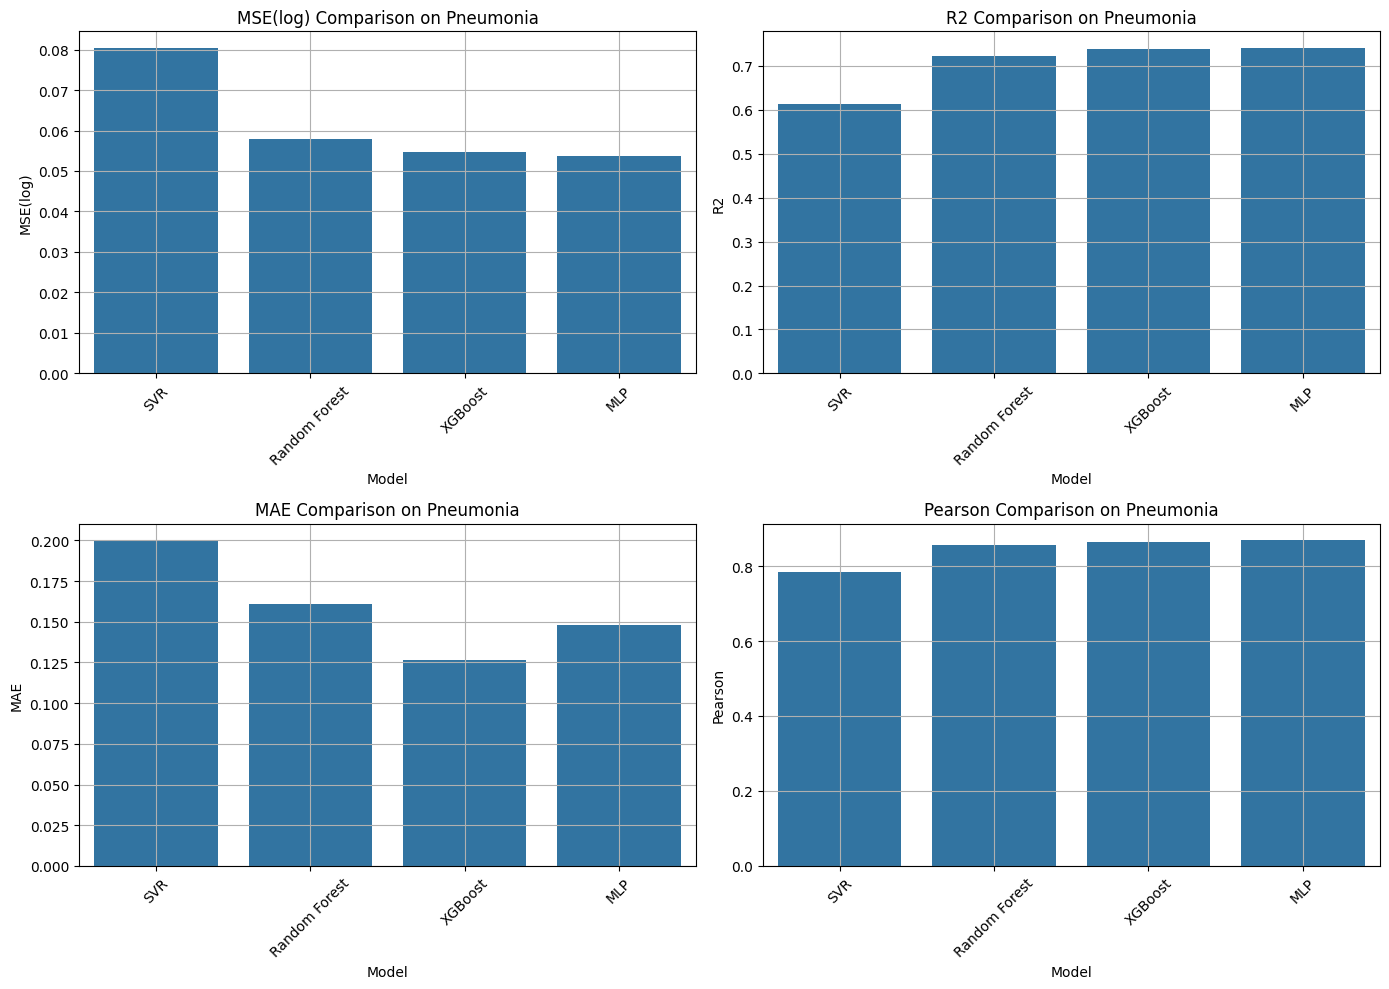

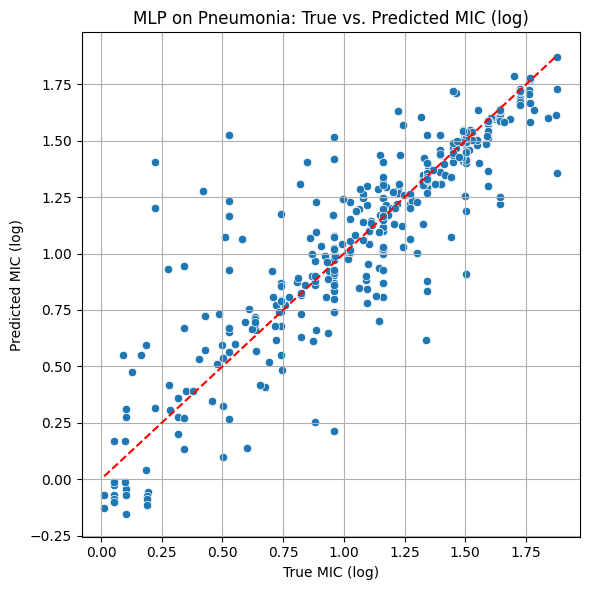

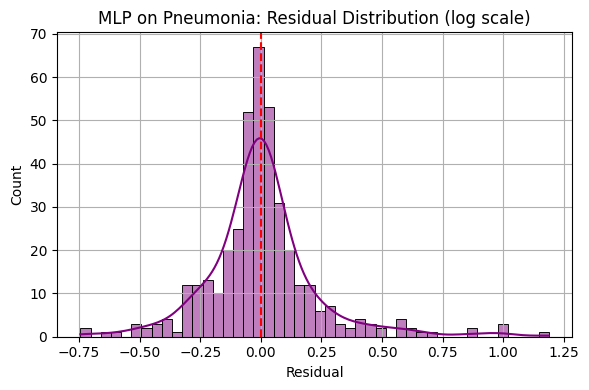

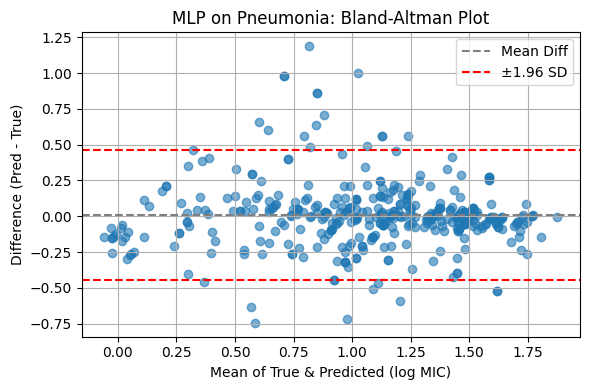

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_mic_targets.npy"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)


X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


results = {}
predictions = {}

def evaluate_model(model, model_name, X_train_input, X_test_input):
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
    mse_no_log = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test_log, np.log1p(y_pred))
    mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
    pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
    kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

    results[model_name] = {
        'MSE(log)': mse_log, 'MSE': mse_no_log, 'R2': r2,
        'MAE': mae, 'Pearson': pearson, 'Kendall': kendall
    }
    predictions[model_name] = y_pred

    print(f"\n{model_name} Results:")
    print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}, MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


print("Training and evaluating SVR...")
evaluate_model(SVR(kernel='rbf'), "SVR", X_train_pca, X_test_pca)

print("Training and evaluating Random Forest Regressor...")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest", X_train, X_test)

print("Training and evaluating XGBoost...")
evaluate_model(xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42), "XGBoost", X_train, X_test)

print("Training and evaluating MLP Regressor...")
evaluate_model(MLPRegressor(hidden_layer_sizes=(512, 128), max_iter=500, random_state=42), "MLP", X_train_pca, X_test_pca)

df_results = pd.DataFrame(results).T
df_results['R2_rank'] = df_results['R2'].rank(ascending=False)
df_results['MSE_rank'] = df_results['MSE'].rank(ascending=True)
df_results['Combined_rank'] = df_results['R2_rank'] + df_results['MSE_rank']
best_model_name = df_results['Combined_rank'].idxmin()

results_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/results/pne_model_evaluation_results.csv"
df_results.to_csv(results_path, index=True)
print(f"\nBest model based on R² + MSE: {best_model_name}")
print(f"📁 Results saved to: {results_path}")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['MSE(log)', 'R2', 'MAE', 'Pearson']

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x=df_results.index, y=df_results[metric], ax=ax)
    ax.set_title(f'{metric} Comparison on {organism}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(df_results.index, rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()


y_pred = predictions[best_model_name]
y_true_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
residuals = y_pred_log - y_true_log

# Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true_log, y=y_pred_log)
plt.plot([min(y_true_log), max(y_true_log)], [min(y_true_log), max(y_true_log)], 'r--')
plt.xlabel("True MIC (log)")
plt.ylabel("Predicted MIC (log)")
plt.title(f"{best_model_name} on {organism}: True vs. Predicted MIC (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals Plot
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Residual Distribution (log scale)")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bland-Altman Plot
mean_values = (y_true_log + y_pred_log) / 2
diff = y_pred_log - y_true_log
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.figure(figsize=(6, 4))
plt.scatter(mean_values, diff, alpha=0.6)
plt.axhline(mean_diff, color='gray', linestyle='--', label="Mean Diff")
plt.axhline(mean_diff + 1.96 * std_diff, color='red', linestyle='--', label="±1.96 SD")
plt.axhline(mean_diff - 1.96 * std_diff, color='red', linestyle='--')
plt.title(f"{best_model_name} on {organism}: Bland-Altman Plot")
plt.xlabel("Mean of True & Predicted (log MIC)")
plt.ylabel("Difference (Pred - True)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## models save


coli model

In [ ]:
import numpy as np
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/coli_mic_targets.npy"
model_base_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/models"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


model_filename = os.path.join(model_base_path, f"{organism_code}_xgboost_model.pkl")
scaler_filename = os.path.join(model_base_path, f"{organism_code}_scaler.pkl")

joblib.dump(xgb_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"✅ Model saved to: {model_filename}")
print(f"✅ Scaler saved to: {scaler_filename}")


y_pred = xgb_model.predict(X_test_scaled)

mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
mse_no_log = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test_log, np.log1p(y_pred))
mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

print(f"\nXGBoost Performance on {organism}:")
print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}")
print(f"MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


sample_index = 0
X_sample = X_test[sample_index].reshape(1, -1)
y_sample_true = y_test[sample_index]
X_sample_scaled = scaler.transform(X_sample)
y_sample_pred = xgb_model.predict(X_sample_scaled)[0]

print(f"\nTest Sample Index: {sample_index}")
print(f"True MIC: {y_sample_true:.4f}")
print(f"Predicted MIC: {y_sample_pred:.4f}")


✅ Model saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/coli_xgboost_model.pkl
✅ Scaler saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/coli_scaler.pkl

📈 XGBoost Performance on E. coli:
MSE(log): 0.0481, MSE: 0.4864, R2: 0.7023
MAE: 0.1375, Pearson: 0.8394, Kendall: 0.6725

🔍 Test Sample Index: 0
True MIC: 1.7918
Predicted MIC: 2.0378


aur model

In [ ]:
import numpy as np
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/aur_mic_targets.npy"
model_base_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/models"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


model_filename = os.path.join(model_base_path, f"{organism_code}_xgboost_model.pkl")
scaler_filename = os.path.join(model_base_path, f"{organism_code}_scaler.pkl")

joblib.dump(xgb_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model saved to: {model_filename}")
print(f"Scaler saved to: {scaler_filename}")


y_pred = xgb_model.predict(X_test_scaled)

mse_log = mean_squared_error(y_test_log, np.log1p(y_pred))
mse_no_log = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test_log, np.log1p(y_pred))
mae = mean_absolute_error(y_test_log, np.log1p(y_pred))
pearson, _ = pearsonr(y_test_log, np.log1p(y_pred))
kendall, _ = kendalltau(y_test_log, np.log1p(y_pred))

print(f"\nXGBoost Results on {organism}:")
print(f"MSE(log): {mse_log:.4f}, MSE: {mse_no_log:.4f}, R2: {r2:.4f}")
print(f"MAE: {mae:.4f}, Pearson: {pearson:.4f}, Kendall: {kendall:.4f}")


sample_index = 10
X_sample = X_test[sample_index].reshape(1, -1)
y_sample_true = y_test[sample_index]
X_sample_scaled = scaler.transform(X_sample)
y_sample_pred = xgb_model.predict(X_sample_scaled)[0]

print(f"\nTest Sample {sample_index}")
print(f"True MIC: {y_sample_true:.4f}")
print(f"Predicted MIC: {y_sample_pred:.4f}")


✅ Model saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/aur_xgboost_model.pkl
✅ Scaler saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/aur_scaler.pkl

📈 XGBoost Results on Staphylococcus aureus:
MSE(log): 0.0517, MSE: 0.4988, R2: 0.6828
MAE: 0.1472, Pearson: 0.8278, Kendall: 0.6536

🔍 Test Sample 0
True MIC: 1.6094
Predicted MIC: 2.1593


arg model

In [ ]:
import numpy as np
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, kendalltau
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/arg_mic_targets.npy"
model_base_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/models"

file_name = os.path.basename(embedding_path)
organism_code = file_name.split("_")[0].lower()
organism_names = {
    "pne": "Pneumonia",
    "aur": "Staphylococcus aureus",
    "coli": "E. coli",
    "arg": "Pseudomonas aeruginosa"
}
organism = organism_names.get(organism_code, organism_code.upper())


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


model_filename = os.path.join(model_base_path, f"{organism_code}_xgboost_model.pkl")
scaler_filename = os.path.join(model_base_path, f"{organism_code}_scaler.pkl")

joblib.dump(xgb_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model saved to: {model_filename}")
print(f"Scaler saved to: {scaler_filename}")


sample_index = 0
X_sample = X_test[sample_index].reshape(1, -1)
y_sample_true = y_test[sample_index]
X_sample_scaled = scaler.transform(X_sample)
y_sample_pred = xgb_model.predict(X_sample_scaled)[0]

print(f"\nTest Sample {sample_index}")
print(f"True MIC: {y_sample_true:.4f}")
print(f"Predicted MIC: {y_sample_pred:.4f}")


✅ Model saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/arg_xgboost_model.pkl
✅ Scaler saved to: /content/drive/MyDrive/AMPs/Project Data/Regression Part/models/arg_scaler.pkl

🔍 Test Sample 0
True MIC: 3.7136
Predicted MIC: 3.7072


In [ ]:
import numpy as np
import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os


embedding_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_protbert_embeddings.npy"
target_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/emb/pne_mic_targets.npy"
model_save_path = "/content/drive/MyDrive/AMPs/Project Data/Regression Part/models/pne_mlp_model.pkl"


X = np.load(embedding_path)
y = np.load(target_path)
y_log = np.log1p(y)


X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


mlp = MLPRegressor(hidden_layer_sizes=(512, 128), max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train)

joblib.dump(mlp, model_save_path)
joblib.dump(scaler, model_save_path.replace("mlp_model", "scaler"))
joblib.dump(pca, model_save_path.replace("mlp_model", "pca"))

print(f"MLP model, scaler, and PCA saved at:\n{model_save_path}")


sample_index = 10
X_sample = X_test[sample_index].reshape(1, -1)
y_sample_true = y_test[sample_index]

X_sample_scaled = scaler.transform(X_sample)
X_sample_pca = pca.transform(X_sample_scaled)
y_sample_pred = mlp.predict(X_sample_pca)[0]

print(f"\nTest Sample Index: {sample_index}")
print(f"True MIC: {y_sample_true:.4f}")
print(f"Predicted MIC: {y_sample_pred:.4f}")


✅ MLP model, scaler, and PCA saved at:
/content/drive/MyDrive/AMPs/Project Data/Regression Part/models/pne_mlp_model.pkl

🔍 Test Sample Index: 10
True MIC: 0.4167
Predicted MIC: 0.4897


# Test

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import joblib
from math import expm1

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()

def embed_sequence(sequence):
    sequence = ''.join([aa for aa in sequence.upper() if aa in "ACDEFGHIKLMNPQRSTVWY"])
    if len(sequence) < 10:
        raise ValueError("Sequence too short or contains invalid amino acids.")

    spaced_seq = ' '.join(list(sequence))
    tokens = tokenizer(spaced_seq, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
    tokens = {k: v.to(device) for k, v in tokens.items()}

    with torch.no_grad():
        outputs = model(**tokens)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

    return embedding.reshape(1, -1)  # Shape: (1, 1024)

scaler = joblib.load("/content/drive/MyDrive/AMPs/Project Data/Regression Part/models/coli_scaler.pkl")
xgb_model = joblib.load("/content/drive/MyDrive/AMPs/Project Data/Regression Part/models/coli_xgboost_model.pkl")

def predict_mic_for_sequence(sequence):
    try:
        embedded = embed_sequence(sequence)
        scaled = scaler.transform(embedded)
        mic_log = xgb_model.predict(scaled)[0]
        mic = round(expm1(mic_log), 3)
        return mic
    except Exception as e:
        return f"Error: {str(e)}"




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

🔬 Predicted MIC for sequence 'FLPVLAGGL': Error: Sequence too short or contains invalid amino acids. µg/mL


In [ ]:
seq = "SLQGGAPNFPQPSQQNGGWQVSPDLGRDDKGNTRGQIEIQNKGKDHDFNAG"
predicted_mic = predict_mic_for_sequence(seq)
print(f"Predicted MIC for sequence '{seq}': {predicted_mic} µg/mL")

🔬 Predicted MIC for sequence 'SLQGGAPNFPQPSQQNGGWQVSPDLGRDDKGNTRGQIEIQNKGKDHDFNAG': 7.527 µg/mL
